#(1) Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install py7zr

In [ ]:
import numpy as np
import pandas as pd
import py7zr
import os

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/데이터/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/데이터/sample_submission.csv
/content/drive/MyDrive/데이터/members.csv
/content/drive/MyDrive/데이터/song_extra_info.csv
/content/drive/MyDrive/데이터/songs.csv
/content/drive/MyDrive/데이터/members.csv.7z
/content/drive/MyDrive/데이터/sample_submission.csv.7z
/content/drive/MyDrive/데이터/song_extra_info.csv.7z
/content/drive/MyDrive/데이터/songs.csv.7z
/content/drive/MyDrive/데이터/test.csv.7z
/content/drive/MyDrive/데이터/train.csv.7z
/content/drive/MyDrive/데이터/test.csv
/content/drive/MyDrive/데이터/train.csv


In [ ]:
files = [
    'test.csv.7z',
    'train.csv.7z',
    'songs.csv.7z',
    'members.csv.7z',
    'song_extra_info.csv.7z',
    'sample_submission.csv.7z'
]

input_path = '/content/drive/MyDrive/데이터/'
output_path = '/content/drive/MyDrive/데이터/'

def extract_7z_file(file_name):
    with py7zr.SevenZipFile(input_path + file_name, mode='r') as z:
        z.extractall(path=output_path)

for file in files:
    extract_7z_file(file)

csv_files = [
    'test.csv',
    'train.csv',
    'songs.csv',
    'members.csv',
    'song_extra_info.csv',
    'sample_submission.csv'
]

dfs = {}
for csv_file in csv_files:
    file_path = os.path.join(output_path, csv_file)
    dfs[csv_file] = pd.read_csv(file_path)

## Merge Data

In [ ]:
songs_df = pd.read_csv("/content/drive/MyDrive/데이터/songs.csv")
song_extra_df = pd.read_csv('/content/drive/MyDrive/데이터/song_extra_info.csv')
members_df = pd.read_csv("/content/drive/MyDrive/데이터/members.csv")
train_df = pd.read_csv("/content/drive/MyDrive/데이터/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/데이터/test.csv")

In [ ]:
merge_1 = pd.merge(train_df, songs_df, on = 'song_id', how = 'left')
merge_2 = pd.merge(merge_1, song_extra_df, on = 'song_id', how = 'left')
train = pd.merge(merge_2, members_df, on = 'msno', how = 'left')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [ ]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'name', 'isrc', 'city', 'bd',
       'gender', 'registered_via', 'registration_init_time',
       'expiration_date'],
      dtype='object')

In [ ]:
train_df.shape

(7377418, 6)

In [ ]:
train.shape

(7377418, 20)

In [ ]:
train.to_csv('train_df.csv',index=False)

In [ ]:
merge_3 = pd.merge(test_df, songs_df, on = 'song_id', how = 'left')
merge_4 = pd.merge(merge_3, song_extra_df, on = 'song_id', how = 'left')
test = pd.merge(merge_4, members_df, on = 'msno', how = 'left')
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,愛其實很殘忍,TWUM71400047,1,0,NaN,7,20160219,20170918
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,她說,TWB671005201,1,0,NaN,7,20160219,20170918
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,subarashiki nichijo,JPWP01070260,1,0,NaN,4,20161117,20161124
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,3,30,male,9,20070725,20170430
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,Om Yoga,ITO101121898,3,30,male,9,20070725,20170430


In [ ]:
test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language', 'name', 'isrc', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date'],
      dtype='object')

In [ ]:
test_df.shape

(2556790, 6)

In [ ]:
test.shape

(2556790, 20)

In [ ]:
test.to_csv('test_df.csv', index=False)

In [ ]:
full_df = pd.concat([train_df, test_df], ignore_index=True)
merge_5 = pd.merge(full_df, songs_df, on = 'song_id', how = 'left')
merge_6 = pd.merge(merge_5, song_extra_df, on = 'song_id', how = 'left')
full = pd.merge(merge_6, members_df, on = 'msno', how = 'left')

full.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,id,song_length,genre_ids,artist_name,...,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,NaN,206471.0,359,Bastille,...,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,NaN,284584.0,1259,Various Artists,...,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,NaN,225396.0,1259,Nas,...,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,NaN,255512.0,1019,Soundway,...,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,NaN,187802.0,1011,Brett Young,...,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [ ]:
full.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'id', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language', 'name', 'isrc',
       'city', 'bd', 'gender', 'registered_via', 'registration_init_time',
       'expiration_date'],
      dtype='object')

In [ ]:
full_df.shape

(9934208, 7)

In [ ]:
full.shape

(9934208, 21)

In [ ]:
full.to_csv('full_df.csv', index = False)

## 데이터명과 데이터 타입 변경

In [ ]:
#칼럼명 bd -> age로 변경
train.rename(columns={'bd':'age'}, inplace=True)
test.rename(columns={'bd':'age'}, inplace=True)

In [ ]:
#날짜형 column int -> datetime으로 변경
train['registration_init_time']=pd.to_datetime(train['registration_init_time'],format='%Y%m%d')
train['expiration_date']=pd.to_datetime(train['expiration_date'],format='%Y%m%d')

test['registration_init_time']=pd.to_datetime(test['registration_init_time'],format='%Y%m%d')
test['expiration_date']=pd.to_datetime(test['expiration_date'],format='%Y%m%d')

In [ ]:
# train 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  name                    object        
 13  isrc                    object        
 14  city                    int64         
 15  age                     int64         
 16  gender                  object        
 17  registered_via          int64         
 18  re

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,age,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,2012-01-02,2017-10-05
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,2011-05-25,2017-09-11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,2011-05-25,2017-09-11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,2011-05-25,2017-09-11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,2012-01-02,2017-10-05


In [ ]:
# test 정보 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      int64         
 1   msno                    object        
 2   song_id                 object        
 3   source_system_tab       object        
 4   source_screen_name      object        
 5   source_type             object        
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  name                    object        
 13  isrc                    object        
 14  city                    int64         
 15  age                     int64         
 16  gender                  object        
 17  registered_via          int64         
 18  re

In [ ]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,age,gender,registered_via,registration_init_time,expiration_date
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,愛其實很殘忍,TWUM71400047,1,0,NaN,7,2016-02-19,2017-09-18
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,她說,TWB671005201,1,0,NaN,7,2016-02-19,2017-09-18
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,subarashiki nichijo,JPWP01070260,1,0,NaN,4,2016-11-17,2016-11-24
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,3,30,male,9,2007-07-25,2017-04-30
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,Om Yoga,ITO101121898,3,30,male,9,2007-07-25,2017-04-30


# (2) EDA

In [ ]:
#결측치 확인
train.isna().sum()

,0
msno,0
song_id,0
source_system_tab,24849
source_screen_name,414804
source_type,21539
target,0
song_length,114
genre_ids,118455
artist_name,114
composer,1675706


In [ ]:
# train 결측값 비율 파악
train.isna().sum()/train.shape[0]

,0
msno,0.000000
song_id,0.000000
source_system_tab,0.003368
source_screen_name,0.056226
source_type,0.002920
target,0.000000
song_length,0.000015
genre_ids,0.016056
artist_name,0.000015
composer,0.227140


In [ ]:
#train 결측치의 개수와 비율 확인
import pandas as pd
pd.DataFrame({
    'missing_count': train.isna().sum(),
    'missing_ratio': train.isna().sum() / train.shape[0]
})

,missing_count,missing_ratio
msno,0,0.000000
song_id,0,0.000000
source_system_tab,24849,0.003368
source_screen_name,414804,0.056226
source_type,21539,0.002920
target,0,0.000000
song_length,114,0.000015
genre_ids,118455,0.016056
artist_name,114,0.000015
composer,1675706,0.227140


             Outlier Count
song_length         248713
age                   9491


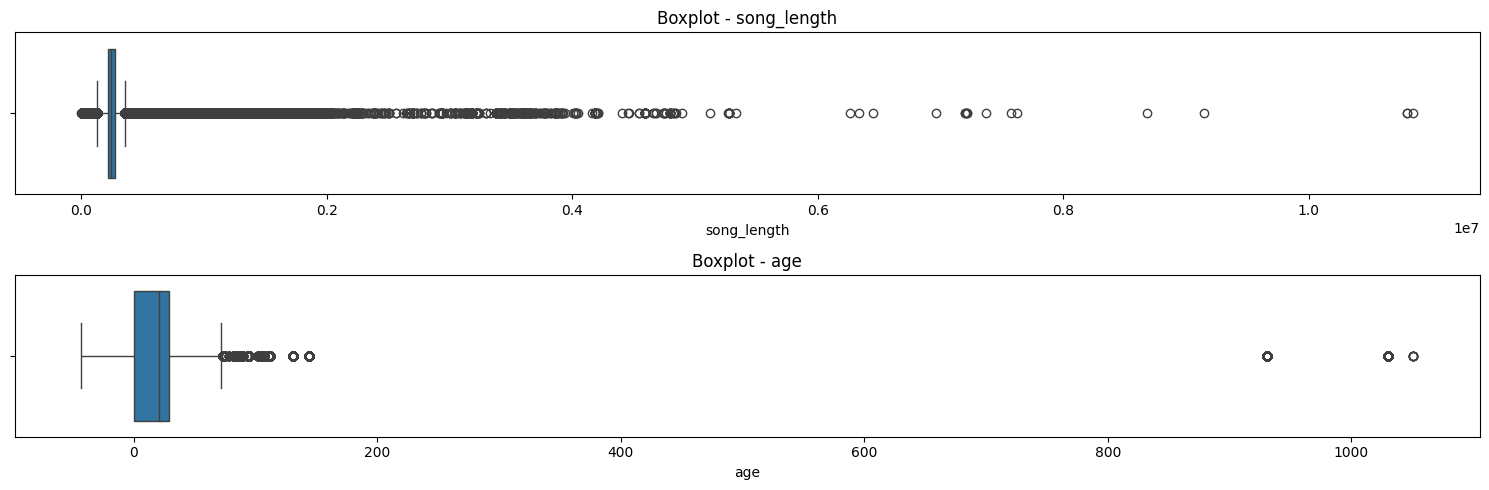

In [ ]:
# 수치형 컬럼별 이상치 탐색
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ['song_length','age']
outlier_counts = {}

for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 개수 계산
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

print(outlier_df)

# 시각화
plt.figure(figsize=(15, len(numeric_cols) * 2.5))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(data=train, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

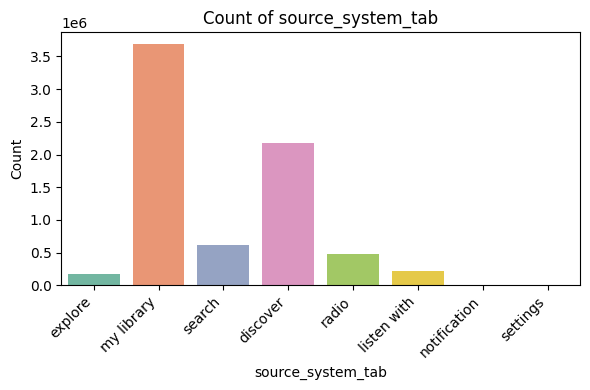

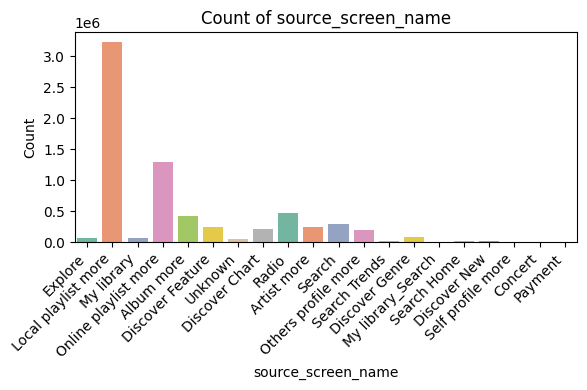

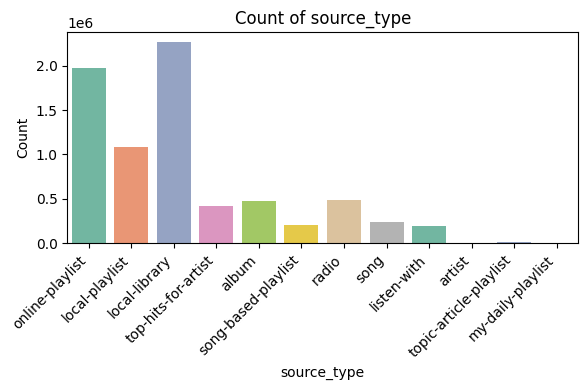

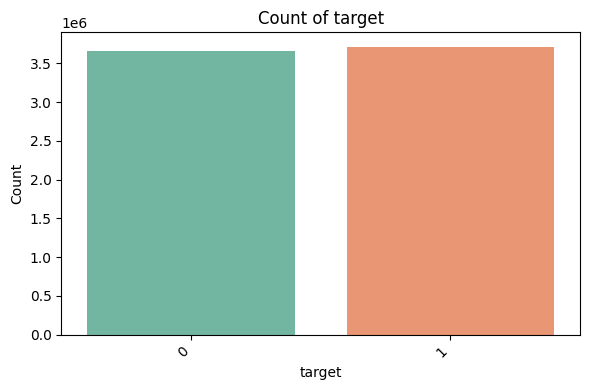

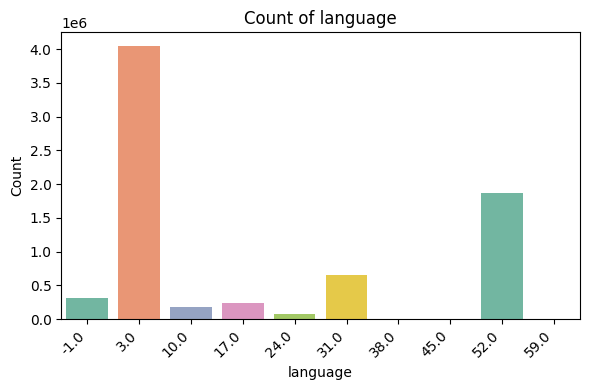

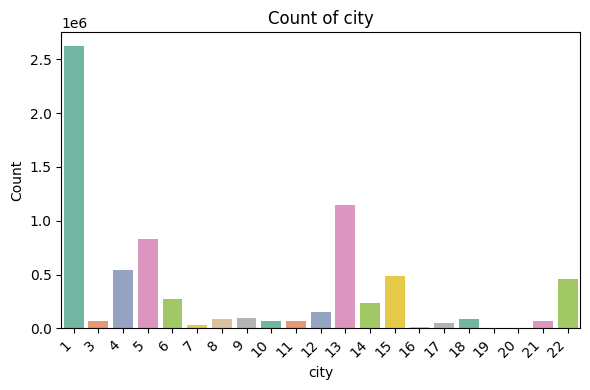

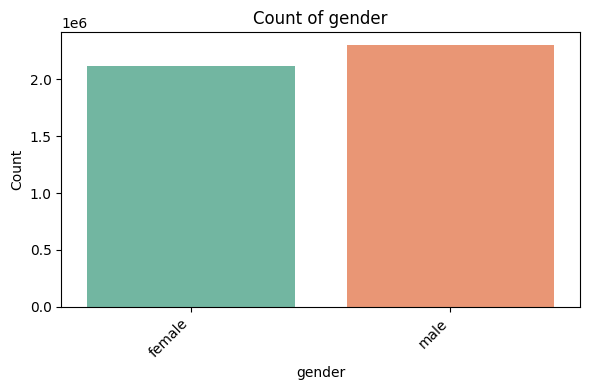

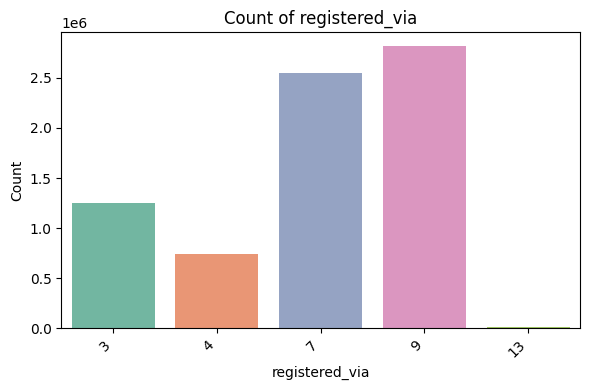

In [ ]:
# 'source_system_tab', 'source_screen_name', 'source_type', 'target','language','city', 'gender', 'registered_via' 변수들 시각화
cat_columns=['source_system_tab', 'source_screen_name', 'source_type', 'target','language','city', 'gender', 'registered_via']

for col in cat_columns:
    top_categories = train[col].value_counts().head(20).index
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train, hue=col, palette='Set2', legend=False)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

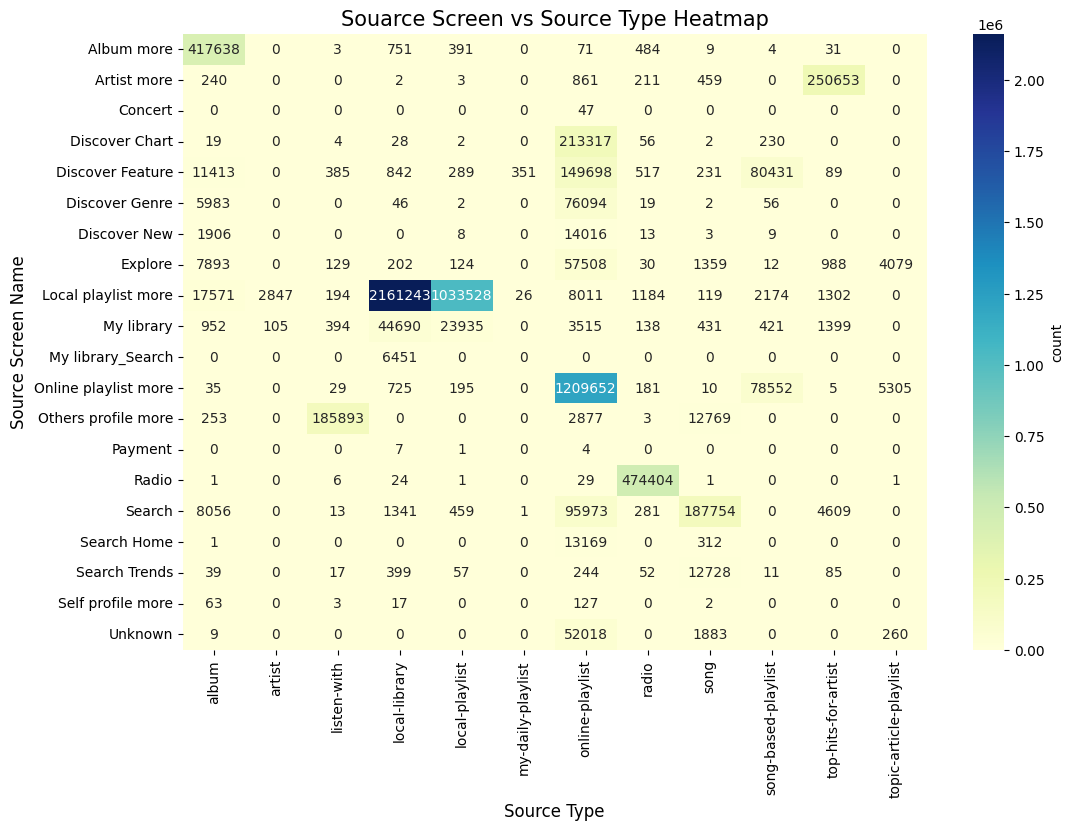

In [ ]:
# 히트맵 생성
pivot_df = train.pivot_table(
    index='source_screen_name',
    columns='source_type',
    values='msno',
    aggfunc='count',
    fill_value=0
)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'count'})
plt.title('Souarce Screen vs Source Type Heatmap', fontsize=15)
plt.xlabel('Source Type', fontsize=12)
plt.ylabel('Source Screen Name', fontsize=12)
plt.show()

target
1    3714656
0    3662762
Name: count, dtype: int64


/tmp/ipython-input-252773532.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_dist.index, y=target_dist.values, palette="plasma")


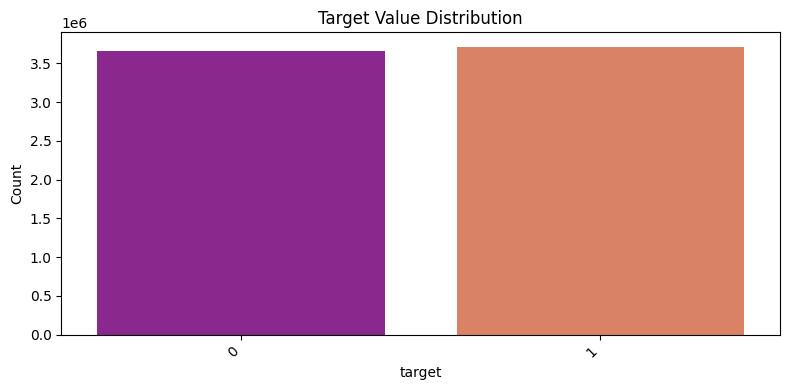

In [ ]:
# 타겟값 분포
target_dist = train["target"].value_counts().sort_values(ascending=False)
print(target_dist)

plt.figure(figsize=(8,4))
sns.barplot(x=target_dist.index, y=target_dist.values, palette="plasma")
plt.xticks(rotation=45, ha="right")
plt.title("Target Value Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

lyricist              3178812
gender                2961479
composer              1675706
isrc                   577858
source_screen_name     414804
genre_ids              118455
source_system_tab       24849
source_type             21539
name                     1457
language                  150
song_length               114
artist_name               114
dtype: int64


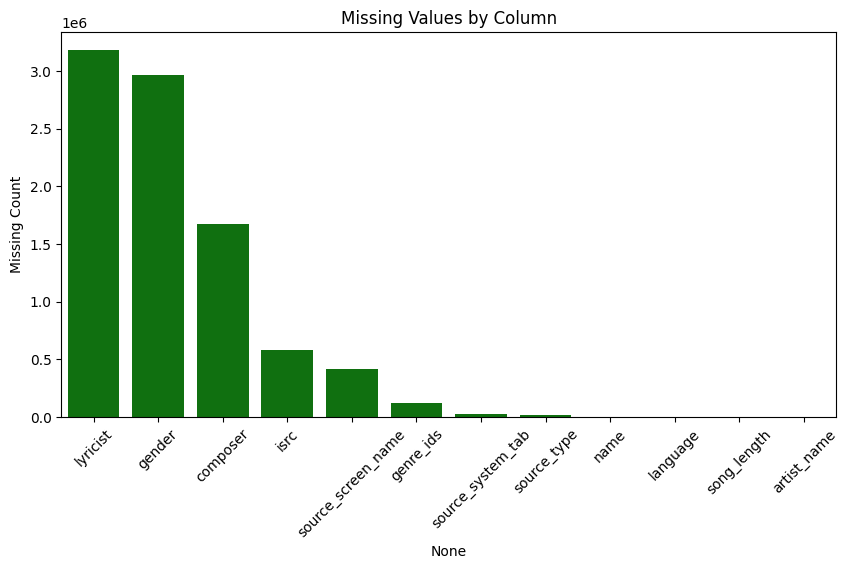

In [ ]:
# 결측치 분포

missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, color='green')
plt.xticks(rotation=45)
plt.title('Missing Values by Column')
plt.ylabel('Missing Count')
plt.show()

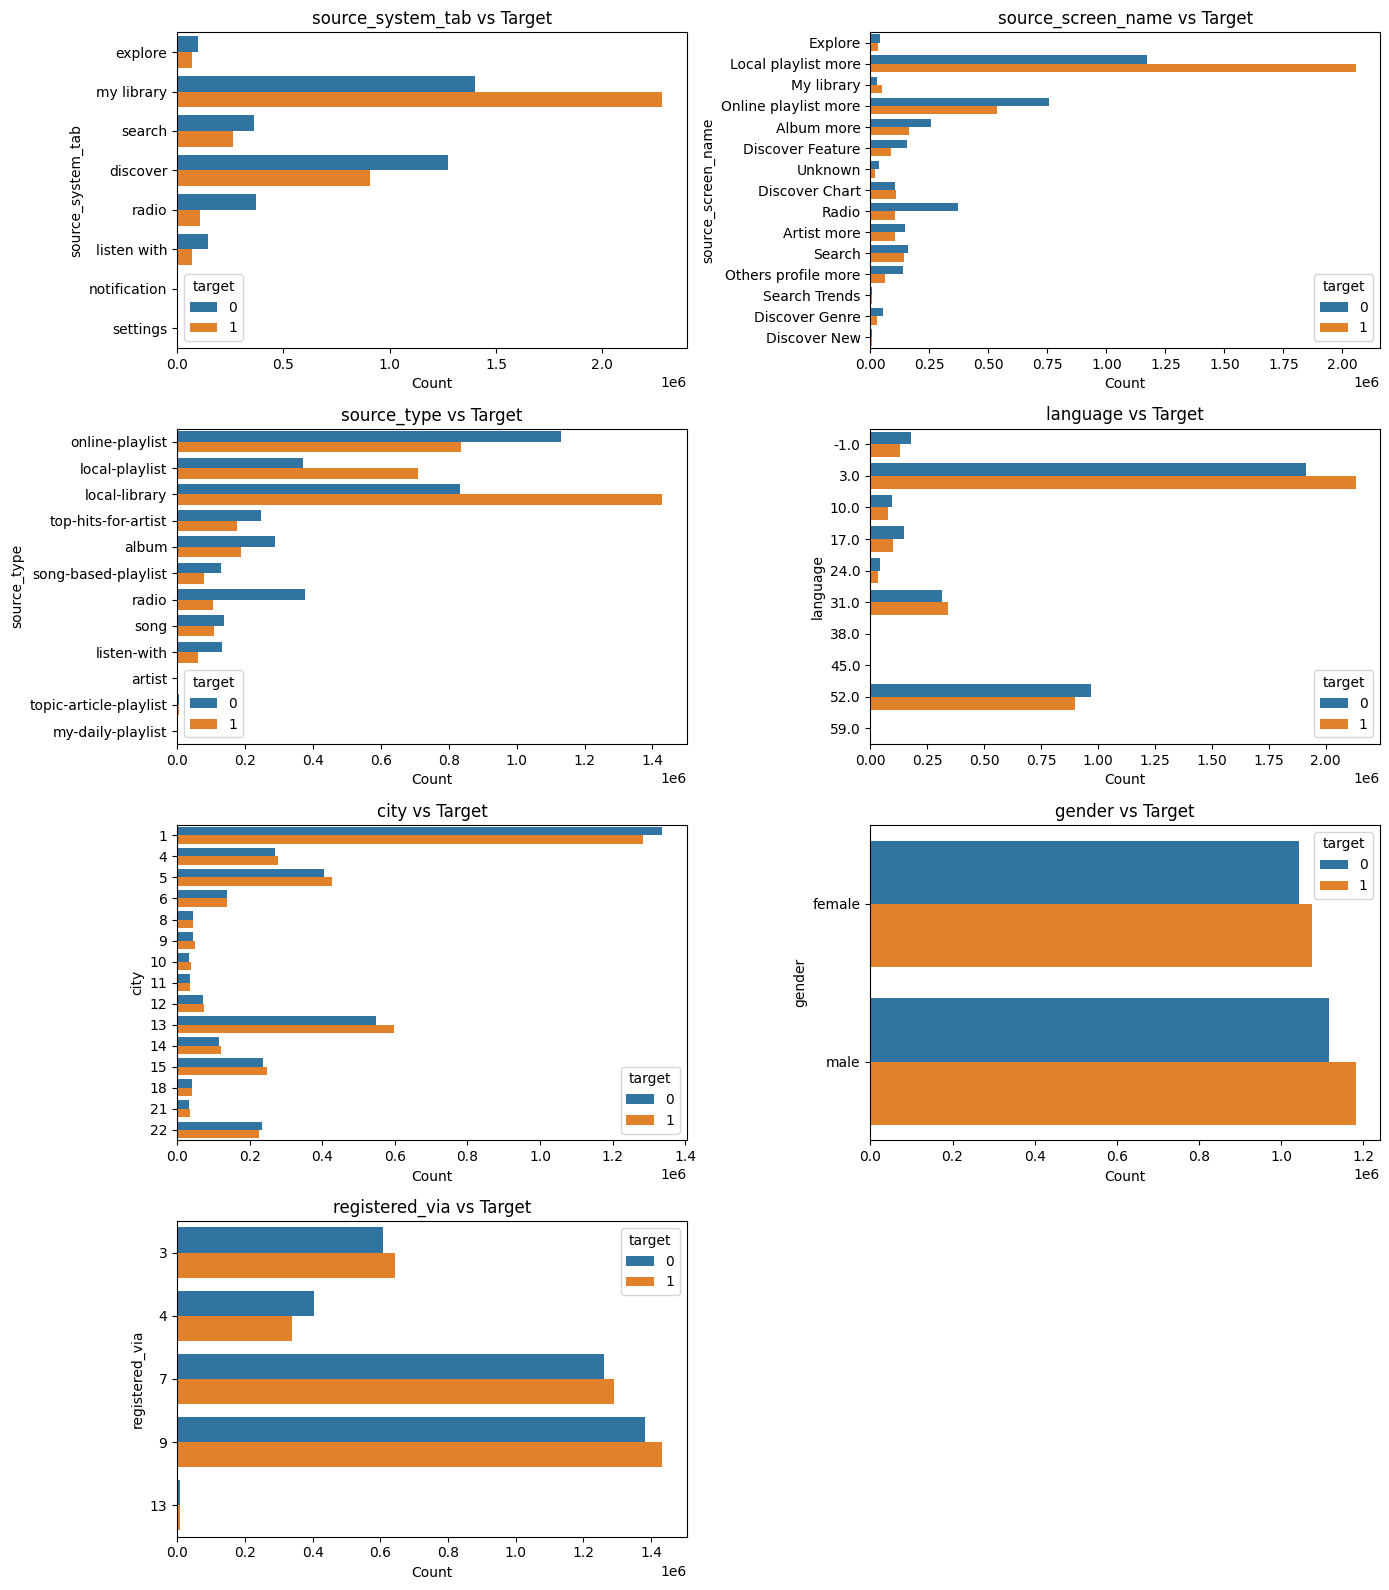

In [ ]:
# 타겟값과 범주형 변수들 분포
cat_cols = ['source_system_tab', 'source_screen_name', 'source_type','language','city','gender','registered_via']

n_cols = 2
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    top_categories = train[col].value_counts().head(15).index
    tmp = train[train[col].isin(top_categories)]
    sns.countplot(data=tmp,y=col,hue='target',ax=axes[i])
    axes[i].set_title(f'{col} vs Target')
    axes[i].set_xlabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- 각 특성(feature)의 모든 값에 대해, 클래스 레이블과의 관계가 거의 균형을 이루고 있음을 보여주고 있음.

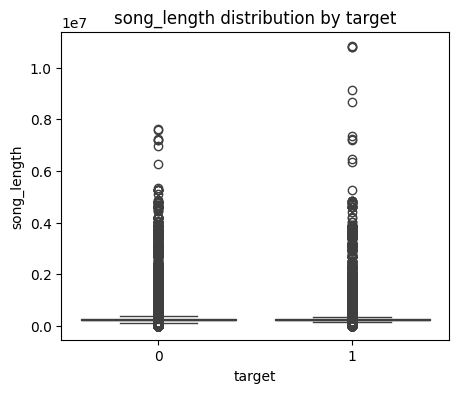

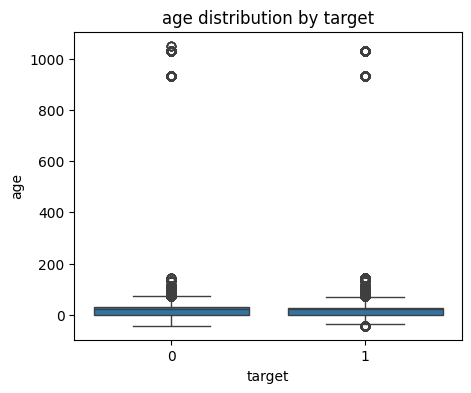

In [ ]:
# 타겟값과 수치형 변수들 분포
numeric_cols = ['song_length','age']
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='target', y=col, data=train)
    plt.title(f'{col} distribution by target')
    plt.show()

필터링 전 사람수: 7377418
필터링 후 사람수: 4427573
필터링 후 분포 count    4.427573e+06
mean     2.873572e+01
std      8.618392e+00
min      1.100000e+01
25%      2.300000e+01
50%      2.700000e+01
75%      3.300000e+01
max      9.500000e+01
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='user_count'>

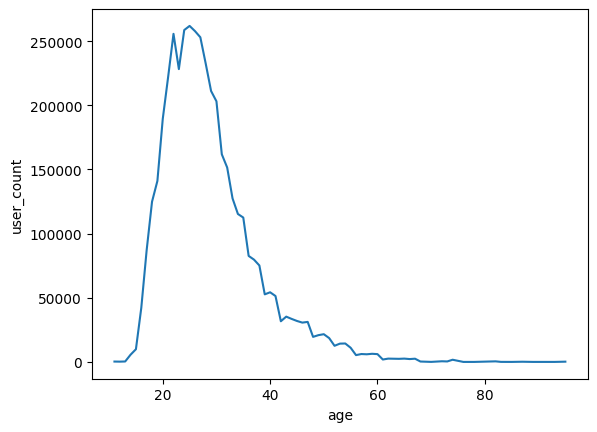

In [ ]:
# 1. 10세~100세만 필터링
valid_age_members = train[(train['age'] > 10) & (train['age'] < 100)]
print('필터링 전 사람수:', train.shape[0])
print('필터링 후 사람수:', valid_age_members.shape[0])
print('필터링 후 분포',valid_age_members['age'].describe())

# 2. 나이별 가입 경로
age_counts = valid_age_members.groupby('age').size().reset_index(name='user_count')

# 3.선그래프
sns.lineplot(data=age_counts, x='age', y='user_count')

# (3) 전처리

In [ ]:
# 확인 필요
# ==============================
# 결측치 unknown 처리
# ==============================
cols_unknown = [
    'song_id', 'source_system_tab', 'source_screen_name','source_type',
    'genre_ids', 'artist_name','composer','lyricist','name','isrc', 'gender'
]

for col in cols_unknown:
    train[col] = train[col].fillna('unknown')
    test[col] = test[col].fillna('unknown')

# ==============================
# song_length 결측치 -> 중앙값 대체
# ==============================
song_length_median = train['song_length'].median()
train['song_length'] = train['song_length'].fillna(song_length_median)

song_length_median = test['song_length'].median()
test['song_length'] = test['song_length'].fillna(song_length_median)

# ==============================
# age가 10살 미만이거나 100이상일경우 -> 중앙값 대체
# ==============================
age_median = train.loc[(train['age'] >= 10) & (train['age'] < 100),'age'].median()
train.loc[(train['age'] < 10) | (train['age'] >= 100), 'age'] = age_median

age_median = test.loc[(test['age'] >= 10) & (test['age'] < 100),'age'].median()
test.loc[(test['age'] < 10) | (test['age'] >= 100), 'age'] = age_median

# ==============================
# language 결측치 -> '-99'로 대체
# ==============================
train['language'] = train['language'].fillna(-99)
test['language'] = test['language'].fillna(-99)

# ==============================
# genre_ids에서맨 앞에 것만 남기기 (‘|’)
# ==============================
train['genre_ids'] = train['genre_ids'].apply(lambda x: str(x).split('|')[0])
test['genre_ids'] = test['genre_ids'].apply(lambda x: str(x).split('|')[0])

In [ ]:
# 결측치 확인
train.isna().sum()

,0
msno,0
song_id,0
source_system_tab,0
source_screen_name,0
source_type,0
target,0
song_length,0
genre_ids,0
artist_name,0
composer,0


In [ ]:
# 결측치 확인
test.isna().sum()

,0
id,0
msno,0
song_id,0
source_system_tab,0
source_screen_name,0
source_type,0
song_length,0
genre_ids,0
artist_name,0
composer,0


# (4) 파생변수

In [ ]:
#=======================================================
#'isrc_country' : 'isrc'에서 앞에 2자리 문자로 등록된 국가 코드를 의미함.
#=======================================================
import numpy as np
train['isrc_country'] = train['isrc'].str[:2]
# isrc에서 QM은 US을 의미함.
train.loc[train['isrc_country']=='QM','isrc_country']='US'
# isrc의 결측치를 unknown으로 하였으므로 -> isrc_country가 un인걸 unknown으로 변경
train.loc[train['isrc_country']=='un','isrc_country']='unknown'

test['isrc_country'] = test['isrc'].str[:2]
test.loc[test['isrc_country']=='QM','isrc_country']='US'
test.loc[test['isrc_country']=='un','isrc_country']='unknown'


#=======================================================
#'isrc_year' : 'isrc'에서 6~7자리로 등록년도를 의미함.
#=======================================================

year = train['isrc'].str[5:7]
year_num = pd.to_numeric(year, errors='coerce')
train['isrc_year'] = np.where(year_num <= 18,2000 + year_num,1900 + year_num)
train['isrc_year']=train['isrc_year'].fillna('unknown')

year = test['isrc'].str[5:7]
year_num = pd.to_numeric(year, errors='coerce')
test['isrc_year'] = np.where(year_num <= 18,2000 + year_num,1900 + year_num)
test['isrc_year']=test['isrc_year'].fillna('unknown')

In [ ]:
#=======================================================
# user_count : 유저별 청취 횟수(msno가 몇 번 등장했는지)
#=======================================================

user_count = train['msno'].value_counts()
train['user_count'] = train['msno'].map(user_count)

user_count = test['msno'].value_counts()
test['user_count'] = test['msno'].map(user_count)


#=======================================================
# song별 청취 횟수 (song_id 등장 횟수)
#=======================================================

song_count = train['song_id'].value_counts()
train['song_count'] = train['song_id'].map(song_count)

song_count = test['song_id'].value_counts()
test['song_count'] = test['song_id'].map(song_count)

In [ ]:
#=======================================================
# membership_days : 가입자의 서비스 이용일
#=======================================================

train['membership_days']=train['expiration_date'].subtract(train['registration_init_time']).dt.days
test['membership_days']=test['expiration_date'].subtract(test['registration_init_time']).dt.days

# Fill NaN values in 'membership_days' with 0 before converting to int
train['membership_days'] = train['membership_days'].fillna(0).astype(int)
test['membership_days'] = test['membership_days'].fillna(0).astype(int)


#=======================================================
# user_genre_preference : 유저-장르 선호도
#=======================================================

# 유저별 + 장르별 청취 횟수 계산 (분자)
user_genre_counts = train.groupby(['msno', 'genre_ids'])['genre_ids'].transform('count')
# 유저별 전체 청취 횟수 계산 (분모)
user_total_counts = train.groupby('msno')['msno'].transform('count')
# 선호도 계산 (비중)
train['user_genre_preference'] = user_genre_counts / user_total_counts

user_genre_counts = test.groupby(['msno', 'genre_ids'])['genre_ids'].transform('count')
user_total_counts = test.groupby('msno')['msno'].transform('count')
test['user_genre_preference'] = user_genre_counts / user_total_counts


#=======================================================
# user_genre_diversity : 유저가 지금까지 소비한 unique genre_ids 개수
#=======================================================

user_genre_diversity = train.groupby('msno')['genre_ids'].nunique()
train['user_genre_diversity'] = train['msno'].map(user_genre_diversity)

user_genre_diversity = test.groupby('msno')['genre_ids'].nunique()
test['user_genre_diversity'] = test['msno'].map(user_genre_diversity)


#=======================================================
#artist entropy : 유저가 들은 전체 곡 수 대비 고유 아티스트 수의 비율
#=======================================================

# 1. 유저별로 고유 아티스트(nunique)와 전체 청취 횟수(count)를 한 번에 계산
artist_stats = train.groupby('msno')['artist_name'].agg(['nunique', 'count']).reset_index()
# 2. 비율 계산 (nunique / count)
artist_stats['artist_entropy'] = artist_stats['nunique'] / artist_stats['count']
# 3. 기존 데이터프레임(df)에 결합
train = train.merge(artist_stats[['msno', 'artist_entropy']], on='msno', how='left')
train['artist_entropy'] = train['artist_entropy'].astype('float32')

artist_stats = test.groupby('msno')['artist_name'].agg(['nunique', 'count']).reset_index()
artist_stats['artist_entropy'] = artist_stats['nunique'] / artist_stats['count']
test = test.merge(artist_stats[['msno', 'artist_entropy']], on='msno', how='left')
test['artist_entropy'] = test['artist_entropy'].astype('float32')

In [ ]:
#=======================================================
#daily_listening_cnt: 특정 유저가 가입 기간(membership_days) 대비 하루 평균 몇 곡을 듣는지
#=======================================================
# 1. 유저별 총 청취 횟수(로그 수) 계산
user_total_listen = train.groupby('msno')['msno'].transform('count')

# 2. Daily Listening Count 계산
# membership_days가 0인 경우를 대비해 pmax(1) 혹은 +1을 해주어 ZeroDivisionError를 방지합니다.
train['daily_listen_cnt'] = user_total_listen / train['membership_days'].apply(lambda x: x if x > 0 else 1)

# 3. 데이터 타입 최적화 (메모리 절약)
train['daily_listen_cnt'] = train['daily_listen_cnt'].astype('float32')

user_total_listen = test.groupby('msno')['msno'].transform('count')
test['daily_listen_cnt'] = user_total_listen / test['membership_days'].apply(lambda x: x if x > 0 else 1)
test['daily_listen_cnt'] = test['daily_listen_cnt'].astype('float32')


#=======================================================
# source_intent :source_type 성격에 따라 grouping
#=======================================================

passive_sources = ['radio', 'topic-article-playlist','listen-with']
active_sources = ['local-library', 'local-playlist', 'album', 'my-daily-playlist', 'artist']
exploratory_sources = ['online-playlist', 'top-hits-for-artist', 'song-based-playlist', 'song', 'unknown']

# 매핑 함수
def map_source_type(x):
    if x in passive_sources:
        return 'Passive'
    elif x in active_sources:
        return 'Active'
    elif x in exploratory_sources:
        return 'Exploratory'
    else:
        return 'Other'

# train/test 적용
train['source_intent'] = train['source_type'].map(map_source_type)
test['source_intent'] = test['source_type'].map(map_source_type)

## 추가 파생변수-> 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# genre_ids의 unknown을'99'로 대체
train['genre_ids'] = train['genre_ids'].replace('unknown', '99')
test['genre_ids']  = test['genre_ids'].replace('unknown', '99')

# 숫자형 변환
train['genre_ids'] = train['genre_ids'].astype(int)
test['genre_ids']  = test['genre_ids'].astype(int)

# Standard Scaling
scaler_genre = StandardScaler()
train['genre_ids_scaled'] = scaler_genre.fit_transform(train[['genre_ids']])
test['genre_ids_scaled']  = scaler_genre.transform(test[['genre_ids']])

In [ ]:
# unknown → NaN
train['isrc_year'] = pd.to_numeric(train['isrc_year'], errors='coerce')
test['isrc_year']  = pd.to_numeric(test['isrc_year'], errors='coerce')

# median
isrc_year_median = train['isrc_year'].median()
train['isrc_year'] = train['isrc_year'].fillna(isrc_year_median)
test['isrc_year']  = test['isrc_year'].fillna(isrc_year_median)

# Scaling
scaler_isrc_year = StandardScaler()
train['isrc_year_scaled'] = scaler_isrc_year.fit_transform(train[['isrc_year']])
test['isrc_year_scaled']  = scaler_isrc_year.transform(test[['isrc_year']])

In [ ]:
# 'isrc'변수 제거
train.drop(columns=['isrc'], inplace=True)
test.drop(columns=['isrc'], inplace=True)

In [ ]:
#'song_length','user_count','song_count','membership_days','daily_listen_cnt' -> 로그변환
log_cols = [
    'song_length',
    'user_count',
    'song_count',
    'membership_days',
    'daily_listen_cnt'
]

for col in log_cols:
    train[f'{col}_log'] = np.log1p(np.maximum(0, train[col]))
    test[f'{col}_log']  = np.log1p(np.maximum(0, test[col]))

In [ ]:
#source_intent-> 라벨 인코딩
le_source_intent = LabelEncoder()

train['source_intent_le'] = le_source_intent.fit_transform(train['source_intent'])
test['source_intent_le']  = le_source_intent.transform(test['source_intent'])

##  train 데이터만 층화추출 샘플링

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

def stratified_sample_train_only(
    train_df: pd.DataFrame,
    target_col: str,
    train_frac: float = 0.2,
    random_state: int = 42
):
    """
    train_df에서 target_col 기준으로 층화추출 샘플링한 train_sam 반환
    """
    if target_col not in train_df.columns:
        raise ValueError(f"'{target_col}' 컬럼이 train_df에 없습니다.")

    y = train_df[target_col]
    n_train = max(1, int(len(train_df) * train_frac))

    sss = StratifiedShuffleSplit(n_splits=1, train_size=n_train, random_state=random_state)
    idx, _ = next(sss.split(train_df, y))

    train_sam = train_df.iloc[idx].reset_index(drop=True)
    return train_sam

In [ ]:
TARGET = "target"

train_sam = stratified_sample_train_only(
    train,
    target_col=TARGET,
    train_frac=0.1,
    random_state=42
)

print(train.shape, "->", train_sam.shape)
print("원본 pos rate:", train[TARGET].mean())
print("샘플 pos rate:", train_sam[TARGET].mean())

(7377418, 37) -> (737741, 37)
원본 pos rate: 0.5035170841614234
샘플 pos rate: 0.5035168168774679


In [ ]:
train_sam.to_csv("train_sam.csv", index=False)
test.to_csv("test_sam.csv", index=False)

# (5) 단일 모델링

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train_sam.csv')
test = pd.read_csv('/content/drive/MyDrive/test_sam.csv')

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

TARGET = "target"

# X/y 분리
X = train.drop(columns=[TARGET])
y = train[TARGET].astype(int)  # 보통 0/1

# train/valid split
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("train:", X_tr.shape, "valid:", X_val.shape, "test:", test.shape)
print("pos rate:", y.mean(), "val pos rate:", y_val.mean())

train: (590192, 36) valid: (147549, 36) test: (2556790, 37)
pos rate: 0.5035168168774679 val pos rate: 0.5035140868457259


- Logistic Regression, RandomForest, XGBoost, LightGBM, CatBoost 등 단일 모델을 적용한 결과, CatBoost가 가장 우수한 성능을 보였다.

- 이에 따라 단일 모델 중 성능이 가장 높았던 CatBoost를 기반으로,
CatBoost + LightGBM + XGBoost / LR,
CatBoost + LightGBM + SVC / LR,
CatBoost + Ridge + ExtraTrees / LR,
CatBoost + MLP + ExtraTrees / LR 등의 Stacking 앙상블 모델을 구성하여 실험을 진행하였다.

- 그러나 Stacking 모델의 성능은 CatBoost 단일 모델 대비 유의미한 향상을 보이지 않았다.

- 아래에는 CatBoost 단일 모델을 사용한 코드를 제시한다.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.4 MB/s eta 0:00:00


In [ ]:
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import roc_auc_score

# 1) CatBoost용 범주형 컬럼(문자형) 자동 탐지
cat_cols = X_tr.select_dtypes(include=["object", "category", "bool", "string"]).columns.tolist()
print("cat cols:", len(cat_cols))

# 2) 범주형 컬럼 문자열 강제 변환
def to_str_cols(df, cols):
    df = df.copy()
    for c in cols:
        df[c] = df[c].astype("string").fillna("NA")
    return df

X_tr_cb  = to_str_cols(X_tr, cat_cols)
X_val_cb = to_str_cols(X_val, cat_cols)
X_test_cb = to_str_cols(test, cat_cols)

# 3) Pool 만들 때 cat_features를 '컬럼명'으로 지정 (인덱스 꼬임 방지)
train_pool = Pool(X_tr_cb, y_tr, cat_features=cat_cols)
valid_pool = Pool(X_val_cb, y_val, cat_features=cat_cols)
test_pool  = Pool(X_test_cb, cat_features=cat_cols)

# 4) 모델 학습
cb_model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    iterations=3000,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    early_stopping_rounds=200,
    verbose=200
)

cb_model.fit(train_pool, eval_set=valid_pool, use_best_model=True)

# valid AUC
val_pred_cb = cb_model.predict_proba(valid_pool)[:, 1]
auc_cb = roc_auc_score(y_val, val_pred_cb)
print(f"[CatBoost] Valid AUC = {auc_cb:.6f}")

# test 예측
test_pred_cb = cb_model.predict_proba(test_pool)[:, 1]

cat cols: 14
0:	test: 0.7209251	best: 0.7209251 (0)	total: 1.99s	remaining: 1h 39m 30s
200:	test: 0.7909604	best: 0.7909604 (200)	total: 9m 32s	remaining: 2h 12m 45s
400:	test: 0.7961842	best: 0.7961842 (400)	total: 18m 59s	remaining: 2h 3m 6s
600:	test: 0.7982528	best: 0.7982533 (599)	total: 28m 33s	remaining: 1h 53m 59s
800:	test: 0.7994767	best: 0.7994767 (800)	total: 38m 11s	remaining: 1h 44m 49s
1000:	test: 0.8003021	best: 0.8003021 (1000)	total: 47m 35s	remaining: 1h 35m 2s
1200:	test: 0.8008417	best: 0.8008417 (1200)	total: 56m 51s	remaining: 1h 25m 9s
1400:	test: 0.8012349	best: 0.8012349 (1400)	total: 1h 6m 7s	remaining: 1h 15m 28s
1600:	test: 0.8015771	best: 0.8015771 (1600)	total: 1h 15m 31s	remaining: 1h 5m 59s
1800:	test: 0.8018459	best: 0.8018459 (1800)	total: 1h 24m 59s	remaining: 56m 34s
2000:	test: 0.8020596	best: 0.8020596 (2000)	total: 1h 34m 26s	remaining: 47m 8s
2200:	test: 0.8023095	best: 0.8023095 (2200)	total: 1h 43m 54s	remaining: 37m 43s
2400:	test: 0.8024382	

In [ ]:
import pandas as pd
import numpy as np


ID_COL = "id"

# 제출 컬럼명
PRED_COL = "target"
if ID_COL is not None and ID_COL in test.columns:
    submission = pd.DataFrame({
        ID_COL: test[ID_COL].values,
        PRED_COL: test_pred_cb
    })
else:
    submission = pd.DataFrame({
        PRED_COL: test_pred_cb
    })

submission.to_csv("submission_catboost.csv", index=False)
submission.head()

,id,target
0,0,0.187934
1,1,0.230651
2,2,0.035781
3,3,0.053948
4,4,0.032912


In [ ]:
SAVE_PATH = "/content/drive/MyDrive/submission_catboost.csv"
submission.to_csv(SAVE_PATH, index=False)
print("Drive 저장 완료:", SAVE_PATH)

Drive 저장 완료: /content/drive/MyDrive/submission_catboost.csv


In [ ]:
print(len(submission), len(test))

2556790 2556790
